In [1]:
import pandas as pd
df = pd.read_excel('../dataset/FinalDataset.xlsx')

In [2]:
df.head(4)

,tags,headline,url,body,general_type,clean_body,target
0,['আমেরিকা দূর পরবাস'],নিউইয়র্কে একুশের গ্রন্থমেলা,https://www.prothomalo.com/life/durporobash/নি...,['<p>২০ ফেব্রুয়ারি বিকেল পাঁচটায় জাতিসংঘের স...,"['life', 'durporobash']",২০ ফেব্রুয়ারি বিকেল পাঁচটায় জাতিসংঘের সদর দ...,durporobash
1,"['বিবিধ', 'বিনোদন']",abc আজকের আয়োজন,https://www.prothomalo.com/entertainment/abc-আ...,['<p>তথ্য ও বিনোদন<br />প্রেমরোগ<br />কথাবন্ধু...,['entertainment'],তথ্য ও বিনোদন প্রেমরোগ কথাবন্ধু শারমীন ও লাভ ...,entertainment
2,"['বিবিধ', 'বিশাল বাংলা']",বিজ্ঞানের তিনটি বিষয়ে সম্মান কোর্স চালুর দাবি,https://www.prothomalo.com/bangladesh/বিজ্ঞানে...,"['<p>কক্সবাজার সরকারি কলেজে পদার্থ, রসায়ন ও প্...",['bangladesh'],কক্সবাজার সরকারি কলেজে পদার্থ রসায়ন ও প্রাণিব...,bangladesh
3,"['মতামত', 'চিঠিপত্র']",এমআরপি সংশোধন ফি,https://www.prothomalo.com/opinion/letter/এমআর...,['<p>বাংলাদেশে ২০০৯ সাল থেকে এমআরপি পাসপোর্ট ক...,"['opinion', 'letter']",বাংলাদেশে ২০০৯ সাল থেকে এমআরপি পাসপোর্ট কার্য...,letter


In [3]:
####### target variable anaysis ########
len(df)

10000

c:\users\mehedi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


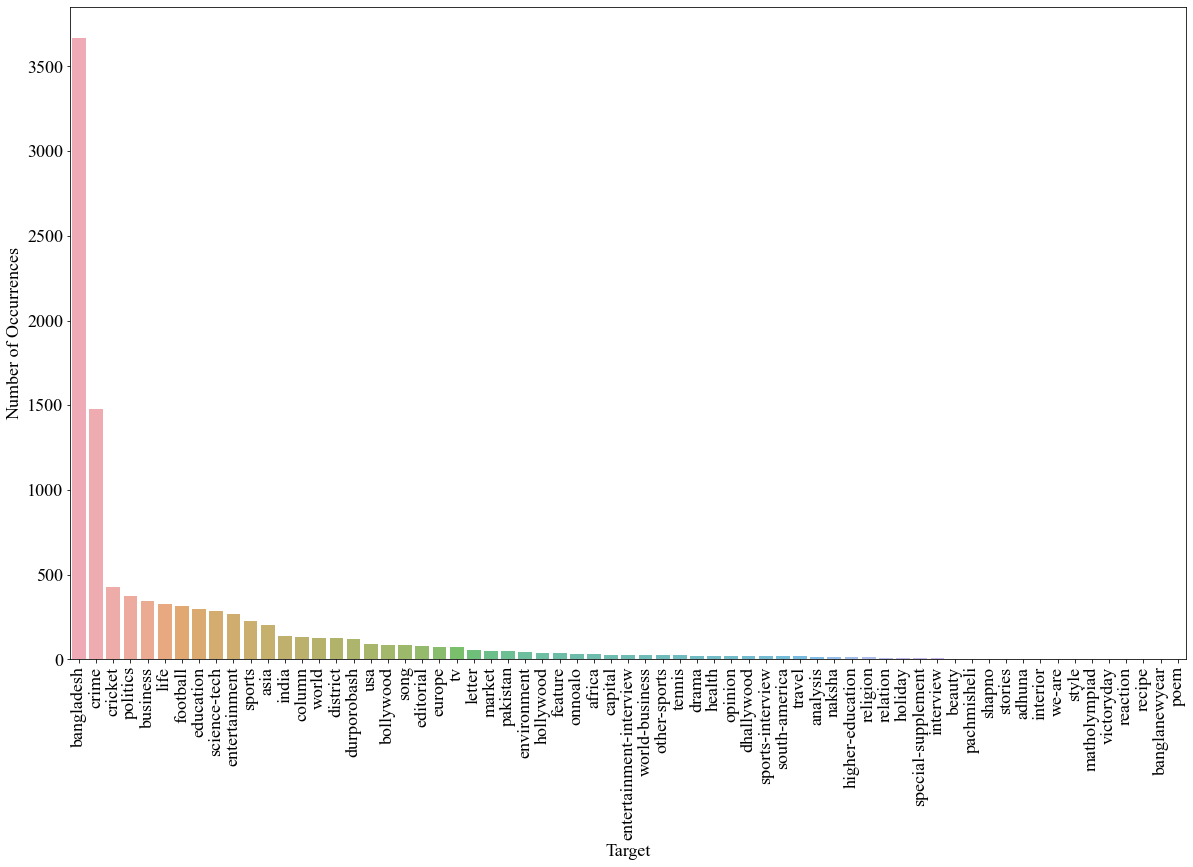

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib 
font = {'family' : 'Times New Roman',
#         'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

target_df = df.target.value_counts() 
plt.figure(figsize=(20,12))
sns.barplot(target_df.index, target_df.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('Target', fontsize=18)
plt.xticks(rotation=90)
plt.savefig('Initial All Target.jpeg')
plt.show()



In [5]:
taken_df = df.target.value_counts().rename_axis('target').reset_index(name='Frequency') 

In [6]:
taken_df 

,target,Frequency
0,bangladesh,3668
1,crime,1476
2,cricket,424
3,politics,371
4,business,343
...,...,...
60,victoryday,1
61,reaction,1
62,recipe,1
63,banglanewyear,1


In [7]:
######## find which target comes only one time ###########
taken_df = taken_df[taken_df.Frequency>100]   

In [8]:
taken_df

,target,Frequency
0,bangladesh,3668
1,crime,1476
2,cricket,424
3,politics,371
4,business,343
5,life,324
6,football,317
7,education,296
8,science-tech,286
9,entertainment,269


c:\users\mehedi\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


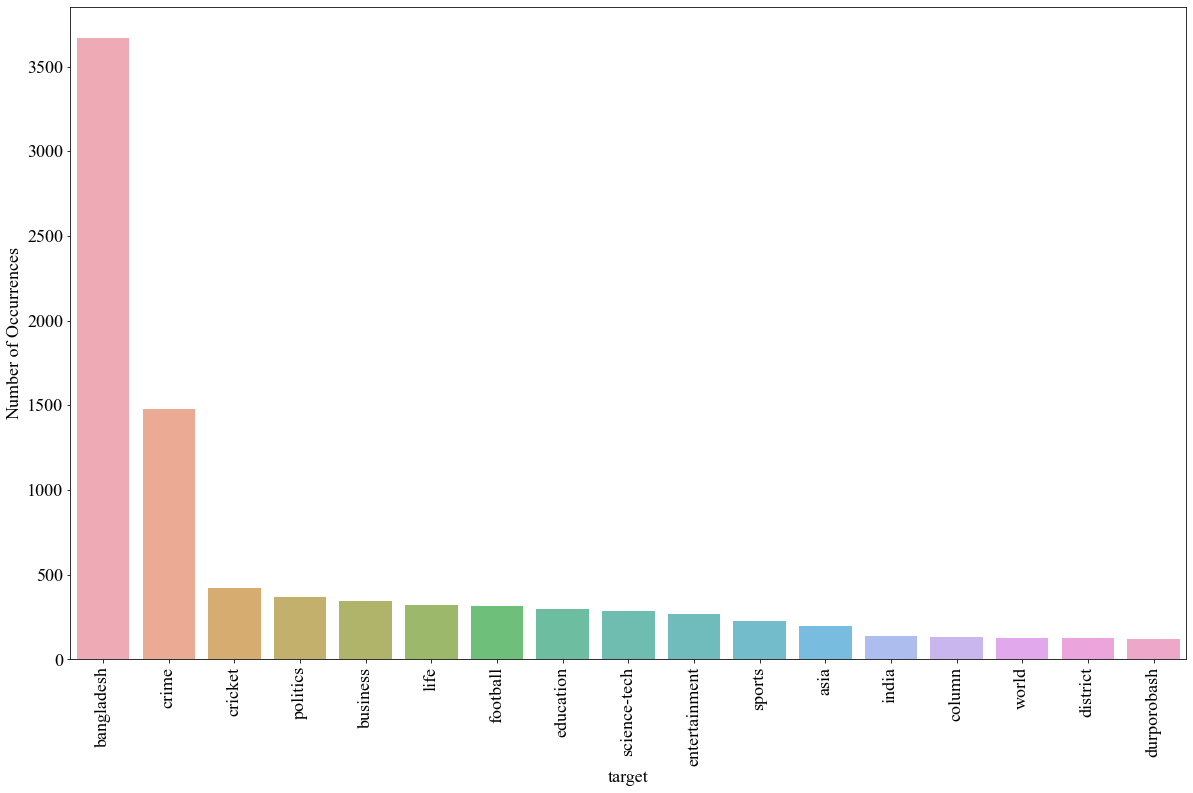

In [9]:
plt.figure(figsize=(20,12))
sns.barplot(taken_df.target.tolist(), taken_df.Frequency.tolist(), alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=18)
plt.xlabel('target', fontsize=18)
plt.xticks(rotation=90)
plt.savefig('Taken target though imbalanced.jpeg')
plt.show()

In [10]:
from statistics import mean
avg_num_target = mean(taken_df.Frequency.tolist())
print(avg_num_target)
print(len(df[df.target == 'durporobash']))


520.0588235294117
119


In [11]:
### merge with final ##
df2 = df.merge(taken_df, on='target') 

In [12]:
del df2['Frequency']

In [13]:
df2.target.value_counts() 

bangladesh       3668
crime            1476
cricket           424
politics          371
business          343
life              324
football          317
education         296
science-tech      286
entertainment     269
sports            229
asia              200
india             137
column            131
world             126
district          125
durporobash       119
Name: target, dtype: int64

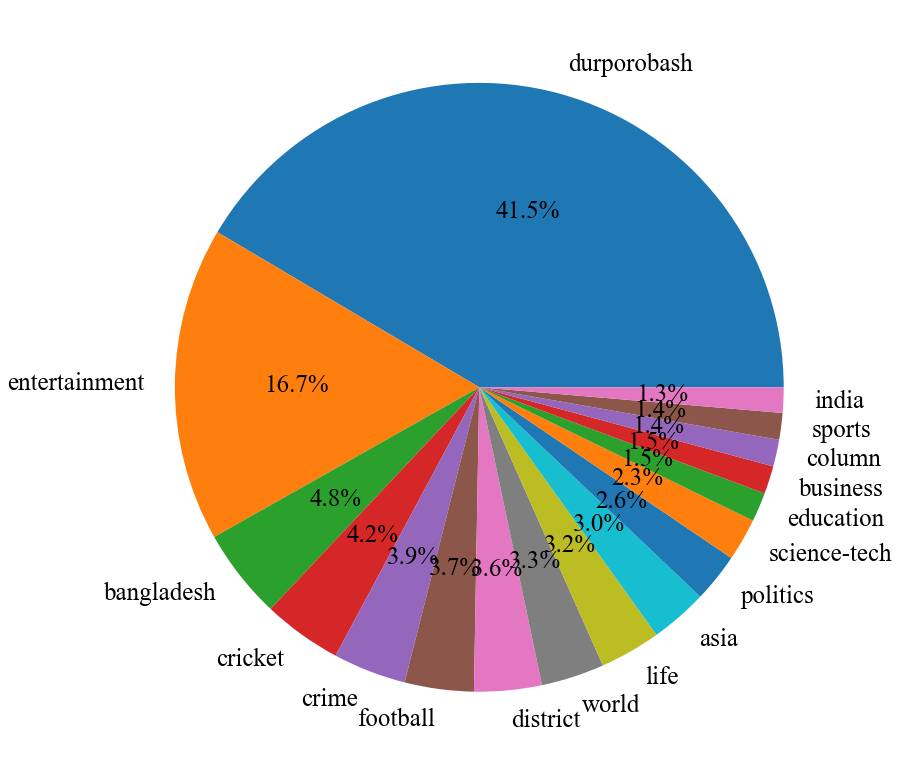

In [14]:
from matplotlib.gridspec import GridSpec
import numpy as np
font = {'family' : 'Times New Roman',
#         'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

targetCounts = df2['target'].value_counts()
targetLabels  = df2['target'].unique()
# Make square figures and axes
cmap = plt.get_cmap('coolwarm')
plt.figure(1, figsize=(18,14))
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=False)
plt.savefig('imbalancedbalancedpie.jpeg')
plt.show()

In [15]:
keep_data = int(avg_num_target)
for i in taken_df.target:  # title df2 is used for reduce time complexity  ### Down sampling ###
    if len(df2[df2.target == i])>keep_data:
        indexNames = df2[df2.target== i ].index
        keep_16 = indexNames[keep_data:]
        df2 = df2.drop(keep_16)
    else:
        pass

In [16]:
master_copy_df = pd.DataFrame()
for i in taken_df.target:  # title df2 is used for reduce time complexity  ### Down sampling ###
    if len(df2[df2.target == i] )<keep_data:     ### up sampling ##
        clone_df = pd.DataFrame()
        indexNames = df2[ df2.target == i ].index
        multi_factor = round(keep_data/len(indexNames)) # already exist same amount of len(indexNames)
        for j in indexNames:
            clone_df = clone_df.append(df2.loc[[j]*multi_factor],ignore_index = True)
        approved_index = keep_data-len(indexNames)
        clone_df = clone_df.iloc[:approved_index]
        frames = [master_copy_df, clone_df]
        master_copy_df = pd.concat(frames)
    else:
        pass

In [17]:
final_frame = [df2, master_copy_df]
final_df = pd.concat(final_frame)

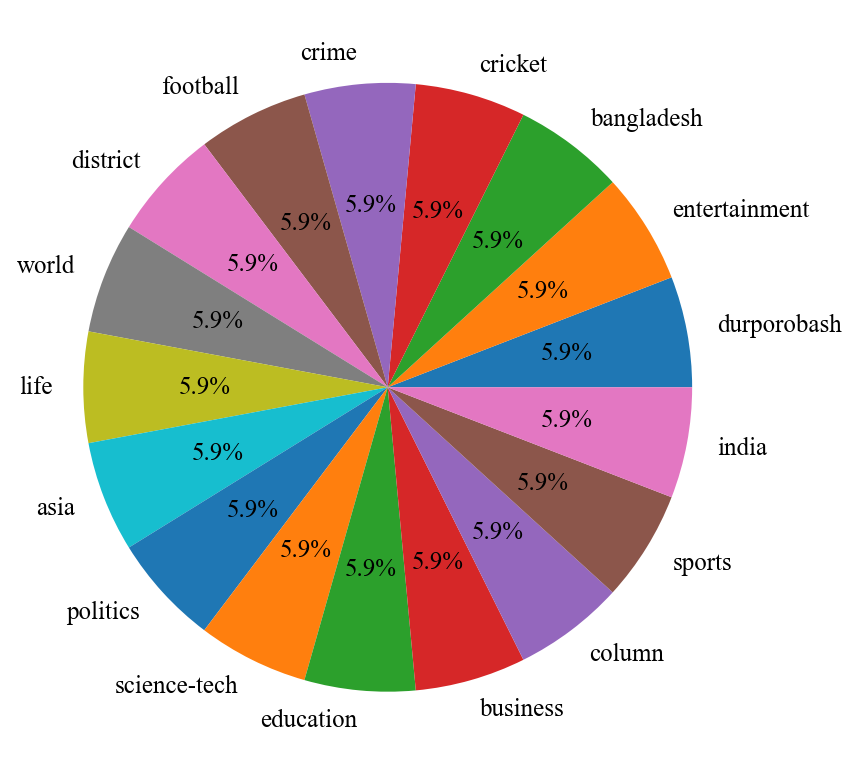

In [18]:
from matplotlib.gridspec import GridSpec
import numpy as np
font = {'family' : 'Times New Roman',
#         'weight' : 'bold',
        'size'   : 25} 

matplotlib.rc('font', **font) 

targetCounts = final_df['target'].value_counts()
targetLabels  = final_df['target'].unique()
# Make square figures and axes
plt.figure(1, figsize=(18,14))
cmap = plt.get_cmap('coolwarm')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=False, )
plt.savefig('balancedpie.jpeg')
plt.show()

In [19]:
final_df.to_excel('../dataset/FinalTrainAbleDataset.xlsx')